Origem dos dados: https://github.com/cassiobolba/Python/tree/master/Python-Apache-Beam

# Apache Beam

# Dependências

In [1]:
!pip install apache_beam[interactive]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.8/307.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 50.8 

In [2]:
import apache_beam as beam
import os

# Hello World


In [ ]:
data = """Id_consulta, status, duracao
1,Cancelada, 0
2,Finalizada, 15
3,Finalizada, 9
4,Cancelada, 0
5,Finalizada, 11
6,Finalizada, 20"""
data

'Id_consulta, status, duracao\n1,Cancelada, 0\n2,Finalizada, 15\n3,Finalizada, 9\n4,Cancelada, 0\n5,Finalizada, 11\n6,Finalizada, 20'

In [ ]:
!echo '{data}' > consultas.txt

In [ ]:
p1 = beam.Pipeline()

consultas_desvio = (
    p1
    | beam.io.ReadFromText('/content/consultas.txt', skip_header_lines=1)
    | beam.Map(lambda record: record.split(','))
    | beam.Filter(lambda record: float(record[2]) <= 11)
    | beam.Filter(lambda record: str(record[1])=='Finalizada')
    | beam.io.WriteToText('/content/consultas_canceladas.txt')
)

p1.run()

# Princiais funções do Apache Beam

## Read Transform
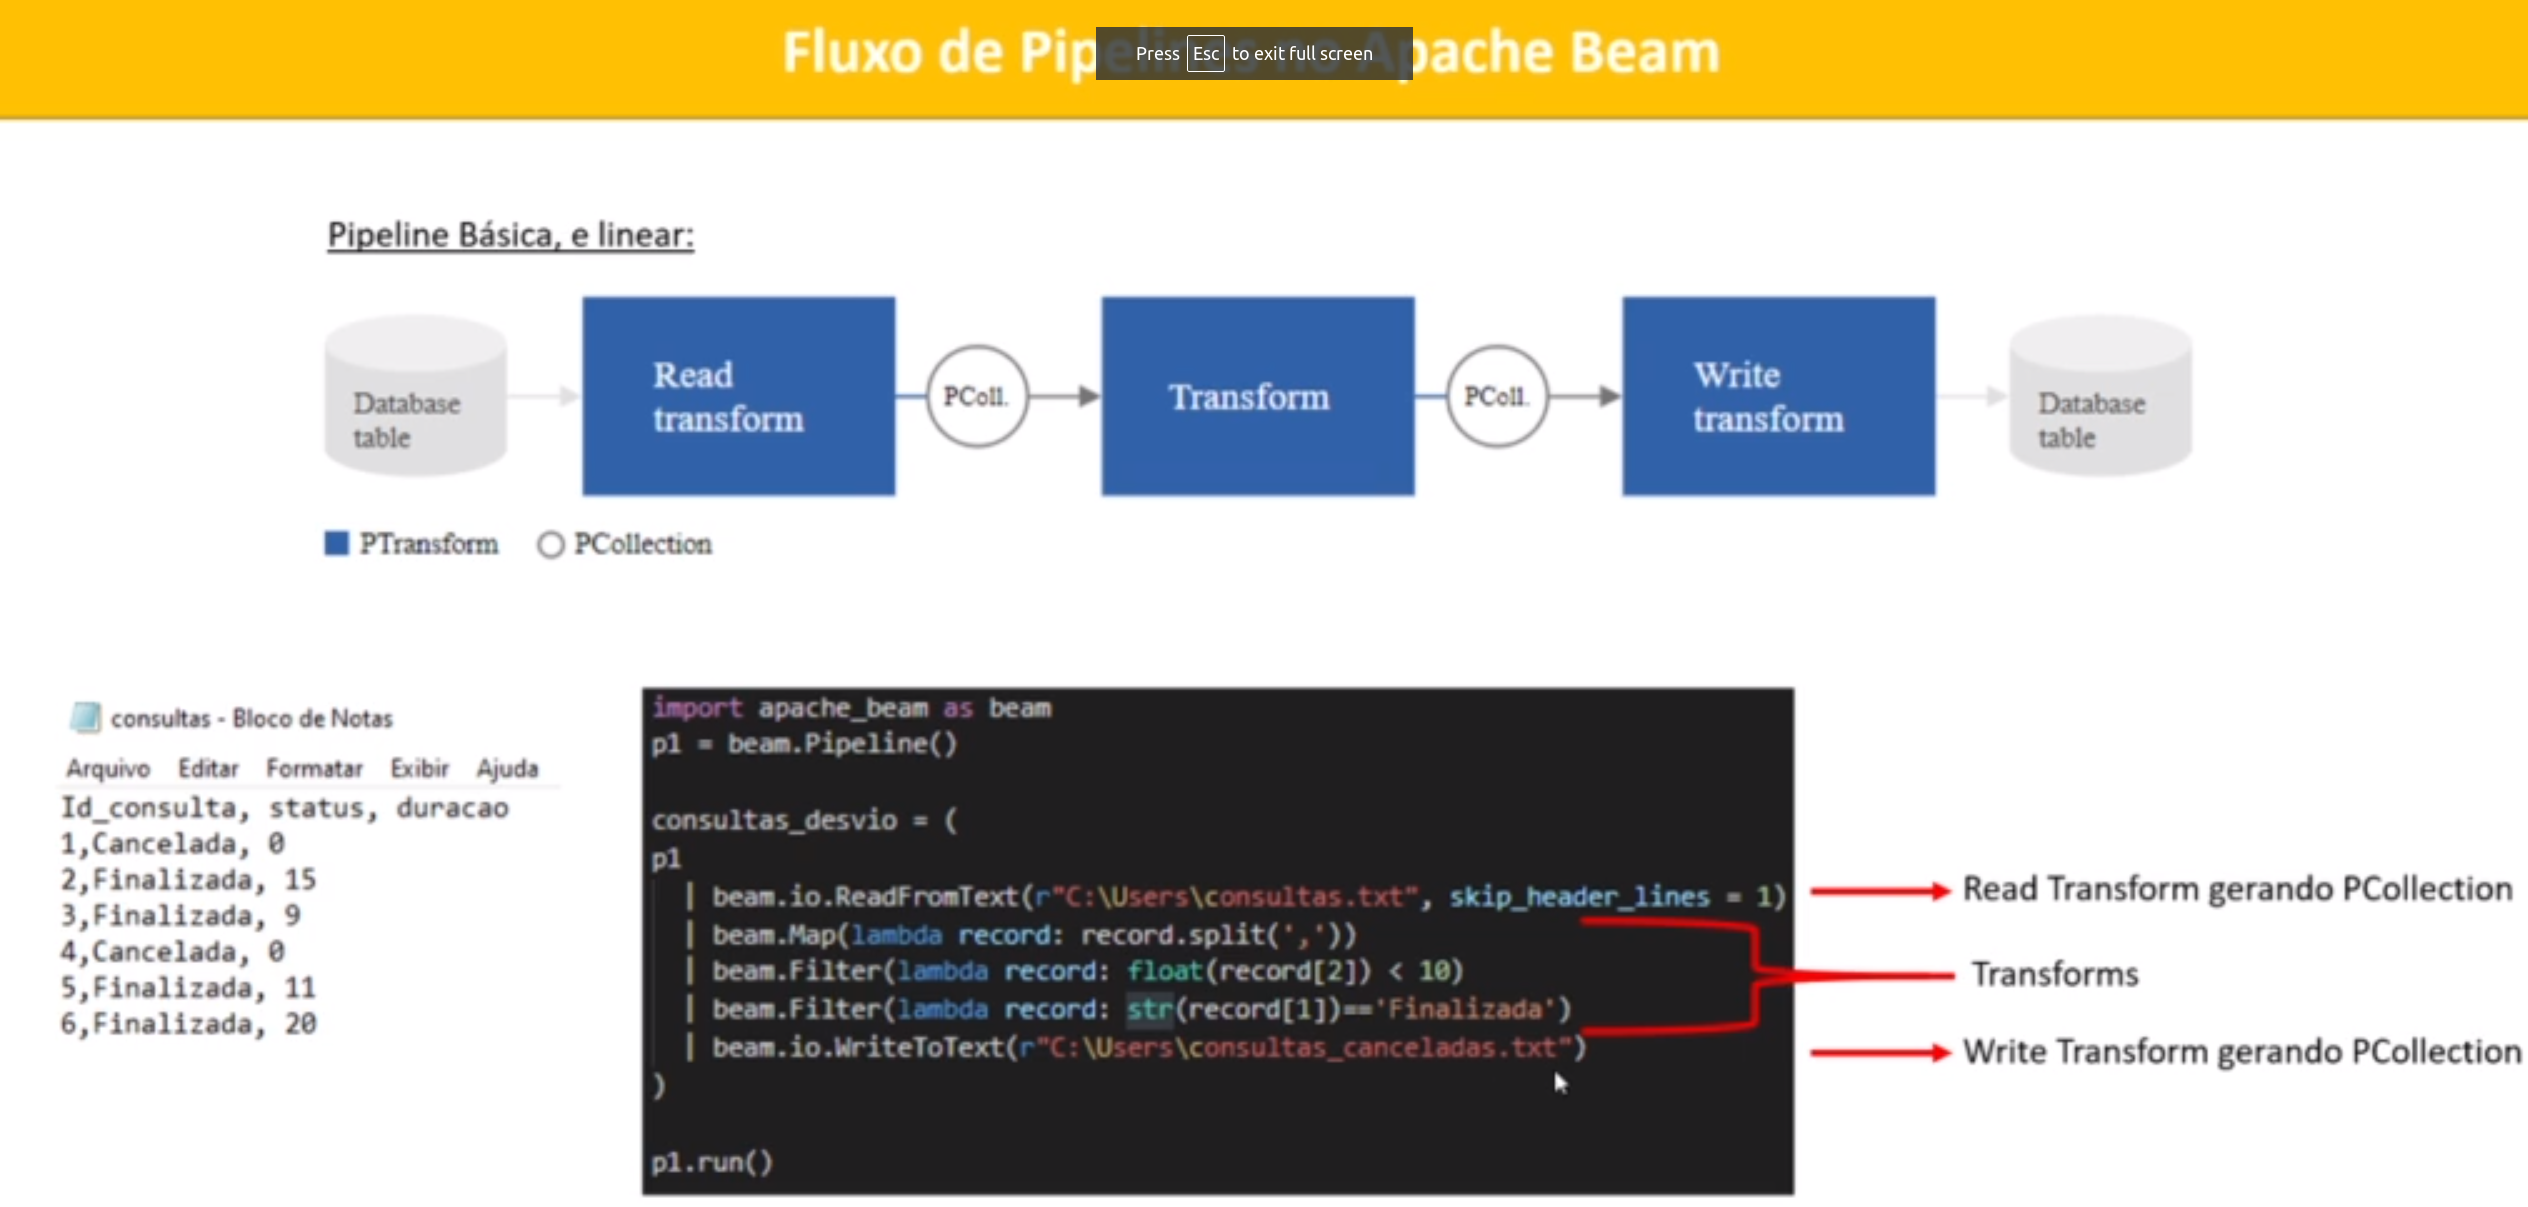

In [ ]:
# Baixar dados
!wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

--2023-11-21 23:37:40--  https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1094 (1.1K) [text/plain]
Saving to: ‘voos_sample.csv’

voos_sample.csv     100%[===================>]   1.07K  --.-KB/s    in 0s      

2023-11-21 23:37:41 (49.0 MB/s) - ‘voos_sample.csv’ saved [1094/1094]



In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# definir pipeline
p1 = beam.Pipeline()

flights = (
    p1
    # ler arquivo e excluir o cabeçalho
    # os pipes "|" significam que um comando é usado como input do outro
    | 'Importar Dados' >> beam.io.ReadFromText(data_path, skip_header_lines=1)
    | 'Separar por Vírgulas' >> beam.Map(lambda record: record.split(','))
    | 'Mostrar Resultados' >> beam.Map(print)
)

# comando para executar
p1.run()

['2019-04-27', '19805', '2', 'LAX', 'JFK', '944', '14', '1736', '-29', '269', '2475', '2']
['2019-04-27', '19805', '3', 'JFK', 'LAX', '1224', '-6', '1614', '39', '371', '2475', '3']
['2019-04-27', '19805', '4', 'LAX', 'JFK', '1240', '25', '2028', '-27', '264', '2475', '4']
['2019-04-27', '19805', '5', 'DFW', 'HNL', '1300', '-5', '1650', '15', '510', '3784', '5']
['2019-04-27', '19805', '6', 'OGG', 'DFW', '1901', '126', '640', '95', '385', '3711', '6']
['2019-04-27', '19805', '7', 'DFW', 'OGG', '1410', '125', '1743', '138', '497', '3711', '7']
['2019-04-27', '19805', '8', 'HNL', 'DFW', '1659', '4', '458', '-22', '398', '3784', '8']
['2019-04-27', '19805', '9', 'JFK', 'LAX', '648', '-7', '1029', '19', '365', '2475', '9']
['2019-04-27', '19805', '10', 'LAX', 'JFK', '2156', '21', '556', '1', '265', '2475', '10']
['2019-04-27', '19805', '12', 'LAX', 'JFK', '1113', '-2', '1910', '-40', '267', '2475', '11']
['2019-04-27', '19805', '14', 'OGG', 'LAX', '2235', '5', '618', '-17', '270', '2486', 

## Write Transform
Gravar Resultados

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

In [ ]:
# definir pipeline
p1 = beam.Pipeline()

flights = (
    p1
    # ler arquivo e excluir o cabeçalho
    # os pipes "|" significam que um comando é usado como input do outro
    | 'Importar Dados' >> beam.io.ReadFromText(data_path, skip_header_lines=1)
    | 'Separar por Vírgulas' >> beam.Map(lambda record: record.split(','))
    | 'Gravar Resultado' >> beam.io.WriteToText(os.path.join(os.path.dirname(data_path), 'flights.csv'))
)

# comando para executar
p1.run()

## Map e Flat Map
O FlatMap é mais um desfragmentador. Map é aplicado em cada linha e retorna o resultado agrupado por linha. FlatMap é aplicado em cada linha e retorna o resultado agrupado pelo resultado da operação em cada linha

In [ ]:
data_path = '/content/poema.txt'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/poema.txt

--2023-12-04 11:44:34--  https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/poema.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244 [text/plain]
Saving to: ‘poema.txt’

poema.txt           100%[===================>]     244  --.-KB/s    in 0s      

2023-12-04 11:44:35 (9.75 MB/s) - ‘poema.txt’ saved [244/244]



In [ ]:
# definir pipeline
p1 = beam.Pipeline()

poem = (
    p1
    | 'Importar Dados' >> beam.io.ReadFromText(data_path)
    # o FlatMap é mais um desfragmentador. Map é aplicado em cada linha e
    # retorna o resultado agrupado por linha. FlatMap é aplicado em cada linha e
    # retorna o resultado agrupado pelo resultado da operação em cada linha
    | 'Separar TUDO por Espaço' >> beam.FlatMap(lambda record: record.split(' '))
    | 'Gravar Resultado' >> beam.io.WriteToText(os.path.join(os.path.dirname(data_path), 'poem_result.txt'))
)

# comando para executar
p1.run()

## beam.Filter

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

--2023-12-04 11:58:10--  https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1094 (1.1K) [text/plain]
Saving to: ‘voos_sample.csv’

voos_sample.csv     100%[===================>]   1.07K  --.-KB/s    in 0s      

2023-12-04 11:58:10 (32.0 MB/s) - ‘voos_sample.csv’ saved [1094/1094]



In [ ]:
# Usando Filter Lambda
p1 = beam.Pipeline()

flights = (
    p1
    |   'Importar Dados' >> beam.io.ReadFromText('voos_sample.csv', skip_header_lines=1)
    |   'Separar por Vírgulas' >> beam.Map(lambda record: record.split(','))
    |   'Pegar voos de Los Angeles' >> beam.Filter(lambda record: record[3] == 'LAX')
    |   'Mostrar Resultados' >> beam.Map(print)
)

p1.run()

['2019-04-27', '19805', '2', 'LAX', 'JFK', '944', '14', '1736', '-29', '269', '2475', '2']
['2019-04-27', '19805', '4', 'LAX', 'JFK', '1240', '25', '2028', '-27', '264', '2475', '4']
['2019-04-27', '19805', '10', 'LAX', 'JFK', '2156', '21', '556', '1', '265', '2475', '10']
['2019-04-27', '19805', '12', 'LAX', 'JFK', '1113', '-2', '1910', '-40', '267', '2475', '11']
['2019-04-27', '19805', '22', 'LAX', 'JFK', '1458', '-2', '2336', '11', '272', '2475', '20']


In [ ]:
data_path = '/content/poema.txt'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/poema.txt

In [ ]:
# Usando Filter de Lista
p1 = beam.Pipeline()

words_of_interest = {'quatro', 'um'}

def words_filter(word: str) -> bool:
    """
    Função que retorna True se a palavra passada como parâmetro 'word' pertence
    ao conjunto de palavras 'words_of_interest'
    """
    global words_of_interest
    return word in words_of_interest

poem = (
    p1
    |   'Importar Dados' >> beam.io.ReadFromText('poema.txt')
    |   'Separar por Espaços' >> beam.FlatMap(lambda record: record.split(' '))
    |   'Pegar todas as palavras selecionadas' >> beam.Filter(words_filter)
    |   'Gravar Resultado' >> beam.io.WriteToText('poem_result.txt')
)

p1.run()

## beam.Flatten
Equivalente a operação Union do SQL

In [ ]:
p = beam.Pipeline()

black = ('Adão', 'Jesus', 'Mike')
white = ('Tulio', 'Mary', 'Joca')
indians = ('Vic', 'Marta', 'Tom')

# Criando Pcollection (estrutura de dados do Apache Beam)
black_pc = p | 'Criando Pcollection black' >> beam.Create(black)
white_pc = p | 'Criando Pcollection white' >> beam.Create(white)
indians_pc = p | 'Criando Pcollection indians' >> beam.Create(indians)

# beam.Flatter: equivalente a operação Union do SQL
people = (
    (black_pc, white_pc, indians_pc)
    |   beam.Flatten()
    |   beam.Map(print)
)

p.run()

Vic
Marta
Tom
Adão
Jesus
Mike
Tulio
Mary
Joca


## beam.CombinePerKey
Somar por key de dicionários

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

--2023-12-12 22:21:34--  https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1094 (1.1K) [text/plain]
Saving to: ‘voos_sample.csv’

voos_sample.csv     100%[===================>]   1.07K  --.-KB/s    in 0s      

2023-12-12 22:21:34 (46.9 MB/s) - ‘voos_sample.csv’ saved [1094/1094]



In [ ]:
import apache_beam as beam

p1 = beam.Pipeline()

time_delay = (
    p1
    |   "Importar Dados" >> beam.io.ReadFromText(data_path)
    |   "Separar por Vírgulas" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles" >> beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par" >> beam.Map(lambda record: (record[4], int(record[8])))
        # somas dos valores de atrasos (acúmulo de atrasos)
    |   "Somar por key" >> beam.CombinePerKey(sum)
    |   "Mostrar Resultados" >> beam.Map(print)
)

p1.run()

('LAX', 94)
('HNL', 15)
('DFW', 95)
('OGG', 138)
('JFK', 220)


## beam.combiners.Count.PerKey
Contar por key de dicionários

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

In [ ]:
import apache_beam as beam

p1 = beam.Pipeline()

number_of_delays = (
    p1
    |   "Importar Dados" >> beam.io.ReadFromText(data_path)
    |   "Separar por Vírgulas" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles" >> beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par" >> beam.Map(lambda record: (record[4], int(record[8])))
        # contando quantos atrasos tem cada aeroporto
    |   "Contar por key" >> beam.combiners.Count.PerKey()
    |   "Mostrar Resultados" >> beam.Map(print)
)

p1.run()

('LAX', 5)
('HNL', 1)
('DFW', 1)
('OGG', 1)
('JFK', 4)


## beam.CoGroupByKey
Agrupa a pCollections de dicionários em função de suas keys (semelhante a operação JOIN do SQL)

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

In [ ]:
# ATENÇÃO!!! Os nomes/comentários de cada pipeline precisam ser únicos.

import apache_beam as beam

p1 = beam.Pipeline()

# beam.CombinePerKey
time_delay = (
    p1
    |   "Importar Dados Atraso" >> beam.io.ReadFromText(data_path, skip_header_lines = 1)
    |   "Separar por Vírgulas Atraso" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles com atraso" >> beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par atraso" >> beam.Map(lambda record: (record[4], int(record[8])))
        # somas dos valores de atrasos (acúmulo de atrasos)
    |   "Somar por key" >> beam.CombinePerKey(sum)
    # |   "Mostrar Resultados" >> beam.Map(print)
)

# beam.combiners.Count.PerKey
number_of_delays = (
    p1
    |   "Importar Dados" >> beam.io.ReadFromText(data_path,  skip_header_lines = 1)
    |   "Separar por Vírgulas" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles qtd" >> beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par qtd" >> beam.Map(lambda record: (record[4], int(record[8])))
        # contando quantos atrasos tem cada aeroporto
    |   "Contar por key" >> beam.combiners.Count.PerKey()
    # |   "Mostrar Resultados" >> beam.Map(print)
)

delay_table = (
    # montando um dicionário com os resultados das duas pCollection acima
    {'number_of_delays': number_of_delays, 'time_delay': time_delay}
    # agrupando as duas pCollection em função de suas keys (semelhante a
    # operação JOIN do SQL)
    | "Group By" >> beam.CoGroupByKey()
    | beam.Map(print)
)

p1.run()

('LAX', {'number_of_delays': [4], 'time_delay': [92]})
('HNL', {'number_of_delays': [1], 'time_delay': [15]})
('DFW', {'number_of_delays': [1], 'time_delay': [95]})
('OGG', {'number_of_delays': [1], 'time_delay': [138]})
('JFK', {'number_of_delays': [4], 'time_delay': [220]})


## beam.ParDo
 A transform that considers each element in the input PCollection, performs some processing function (your user code) on that element, and emits zero or more elements to an output PCollection.

In [ ]:
data_path = '/content/voos_sample.csv'

In [ ]:
# Baixar dados
if not os.path.exists(data_path):
    !wget https://raw.githubusercontent.com/cassiobolba/Python/master/Python-Apache-Beam/voos_sample.csv

In [ ]:
import apache_beam as beam

p1 = beam.Pipeline()

class myFilter(beam.DoFn):

    def process(self, record):
        """
        Método sobrescrito
        """
        if int(record[8]) > 0:
            return [record]


# beam.CombinePerKey
time_delay = (
    p1
    |   "Importar Dados Atraso" >> beam.io.ReadFromText(data_path, skip_header_lines = 1)
    |   "Separar por Vírgulas Atraso" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles com atraso" >> beam.ParDo(myFilter()) # beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par atraso" >> beam.Map(lambda record: (record[4], int(record[8])))
        # somas dos valores de atrasos (acúmulo de atrasos)
    |   "Somar por key" >> beam.CombinePerKey(sum)
    # |   "Mostrar Resultados" >> beam.Map(print)
)

# beam.combiners.Count.PerKey
number_of_delays = (
    p1
    |   "Importar Dados" >> beam.io.ReadFromText(data_path,  skip_header_lines = 1)
    |   "Separar por Vírgulas" >> beam.Map(lambda record: record.split(','))
        # voos com atraso
    |   "Pegar voos de Los Angeles qtd" >> beam.ParDo(myFilter()) # beam.Filter(lambda record: int(record[8]) > 0)
        # cria um dicionário
    |   "Criar par qtd" >> beam.Map(lambda record: (record[4], int(record[8])))
        # contando quantos atrasos tem cada aeroporto
    |   "Contar por key" >> beam.combiners.Count.PerKey()
    # |   "Mostrar Resultados" >> beam.Map(print)
)

delay_table = (
    # montando um dicionário com os resultados das duas pCollection acima
    {'number_of_delays': number_of_delays, 'time_delay': time_delay}
    # agrupando as duas pCollection em função de suas keys (semelhante a
    # operação JOIN do SQL)
    | "Group By" >> beam.CoGroupByKey()
    | beam.Map(print)
)

p1.run()

('LAX', {'number_of_delays': [4], 'time_delay': [92]})
('HNL', {'number_of_delays': [1], 'time_delay': [15]})
('DFW', {'number_of_delays': [1], 'time_delay': [95]})
('OGG', {'number_of_delays': [1], 'time_delay': [138]})
('JFK', {'number_of_delays': [4], 'time_delay': [220]})


# ❗Desafios

## ✅ Dado o exemplo de uso do Flatten abaixo, ordene o resultado desse operação em ordem alfabética

In [25]:
# Mesma opereção de cima com ordenação
p = beam.Pipeline()

black = ('Adão', 'Jesus', 'Mike')
white = ('Tulio', 'Mary', 'Joca')
indians = ('Vic', 'Marta', 'Tom')

# Criando Pcollection (estrutura de dados do Apache Beam)
black_pc = p | 'Criando Pcollection black' >> beam.Create(black)
white_pc = p | 'Criando Pcollection white' >> beam.Create(white)
indians_pc = p | 'Criando Pcollection indians' >> beam.Create(indians)

class sortCollection(beam.DoFn):
    def process(self, record):
        return [sorted(record)]


# beam.Flatter: equivalente a operação Union do SQL
people = (
    (black_pc, white_pc, indians_pc)
    |   beam.Flatten()
    # transforms your whole PCollection data into a single list
    |   beam.combiners.ToList()
    |   beam.ParDo(sortCollection())
    |   beam.Map(print)
)

p.run()

['Adão', 'Jesus', 'Joca', 'Marta', 'Mary', 'Mike', 'Tom', 'Tulio', 'Vic']
